# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Problem definition
The goal is to predict whether a patient has diabetes based on a set of diagnostic health measurements. The task is to build a model that can accurately classify patients as diabetic (1) or non-diabetic (0).

## Import data and create Dataframe

In [2]:
df = pd.read_csv("/workspaces/josefina-aispuro-merelles-machine-learning/data/raw/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Descriptive Analysis

In [3]:
# Check the dimensions
df.shape

(768, 9)

In [4]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Generate a statistical summary of numerical columns and transpose it for readability
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Observations
- There are 768 rows and 9 columns.
- No missing values.
- The data contains only numerical features.

## Data Cleaning

In [6]:
# Looking for duplicated data
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [7]:
# Dropping duplicates if True
if df.duplicated().sum():
        df = df.drop_duplicates()
        
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Observations
No duplicates found.

## Visualization

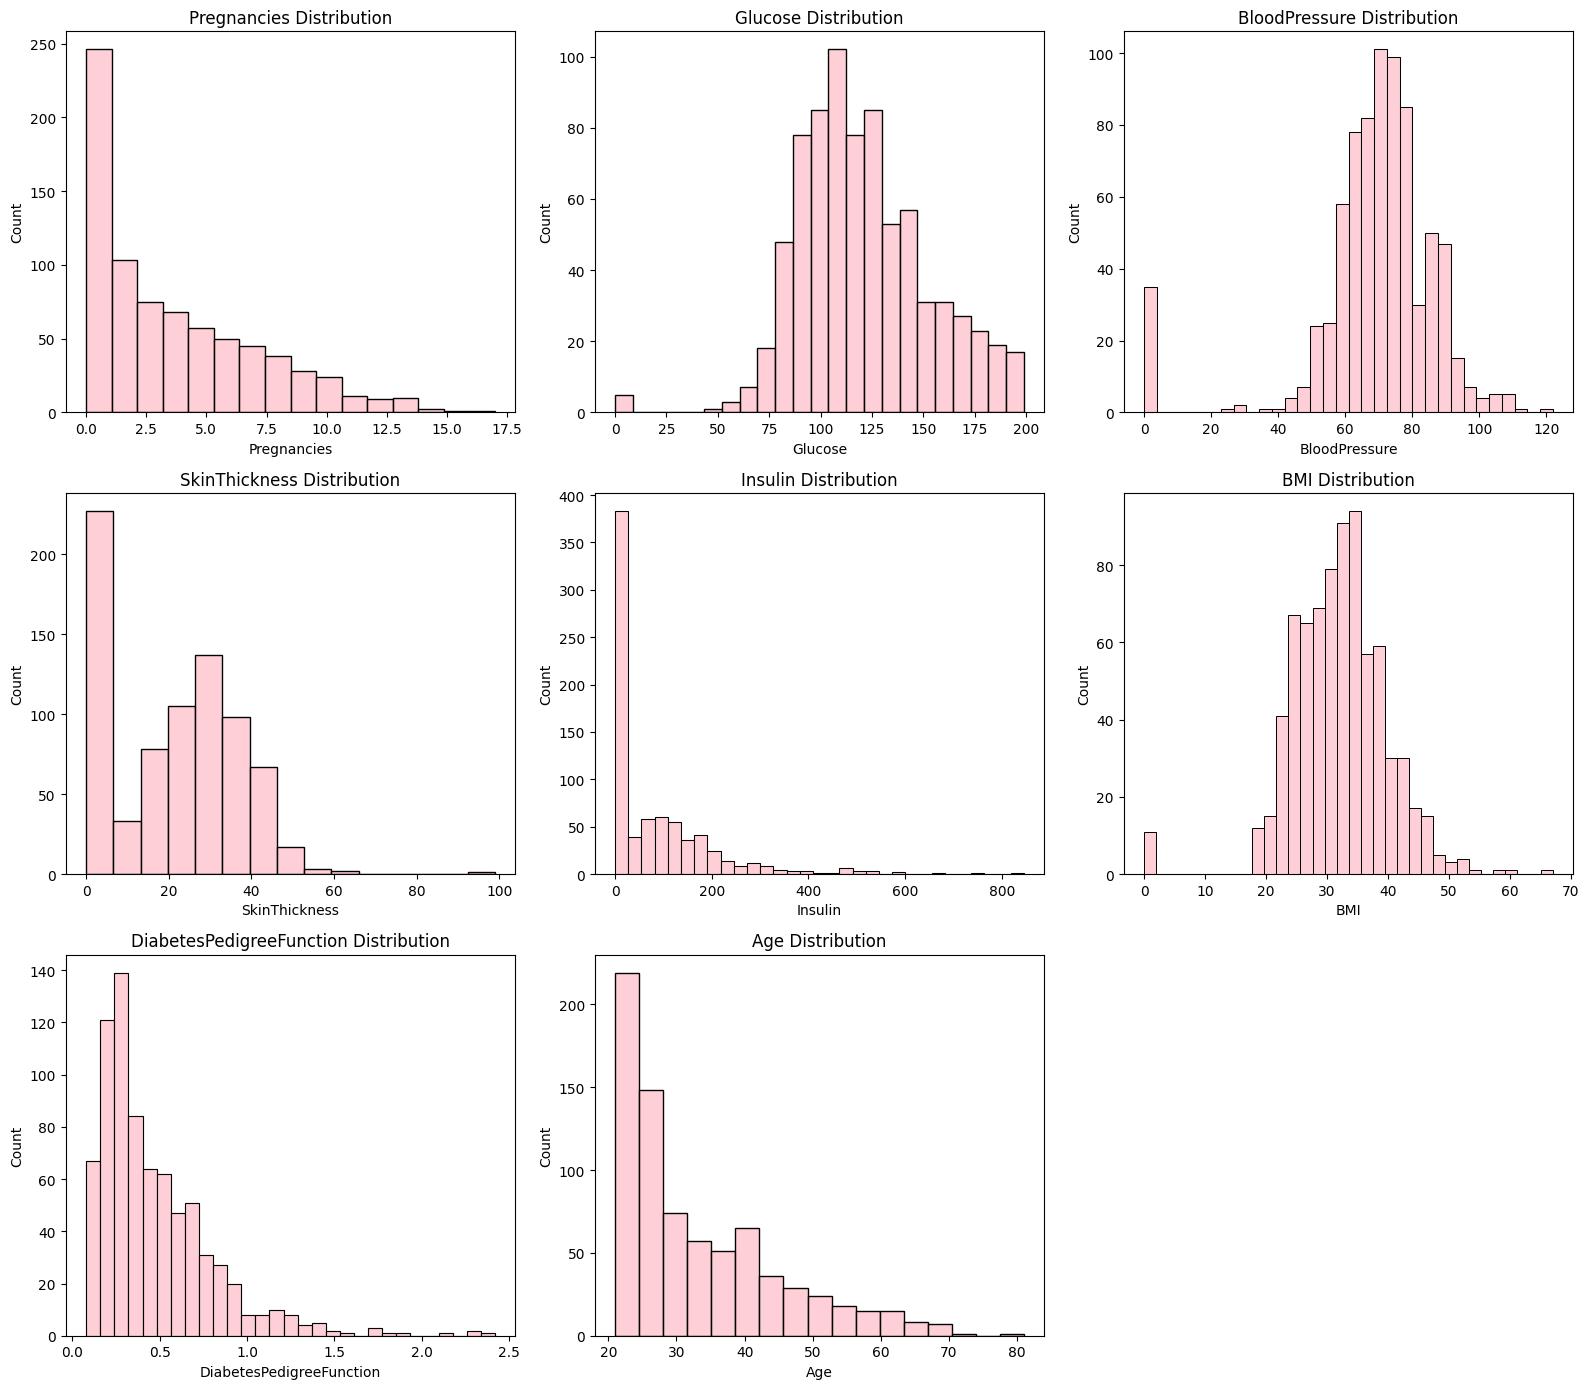

In [8]:
# Histograms
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

plt.figure(figsize=(16, 14))
position = 1

for column in columns:
    plt.subplot(3, 3, position)
    sns.histplot(df[column], color="pink")
    plt.title(f"{column} Distribution")
    position += 1

plt.tight_layout()
plt.show()

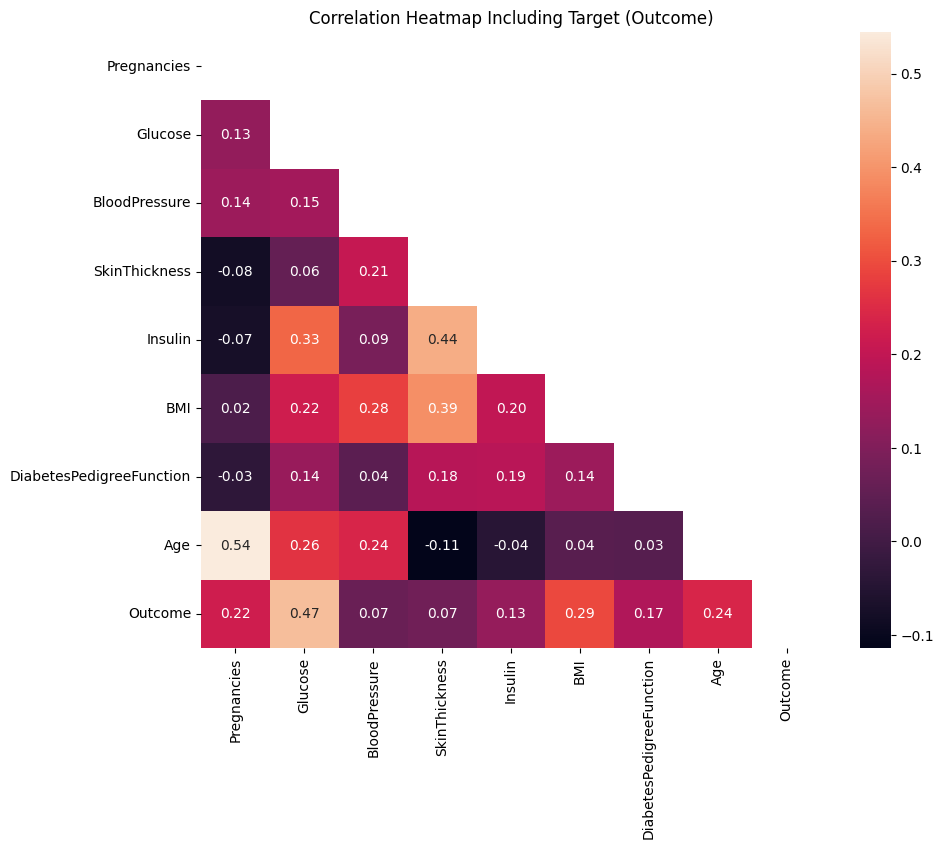

In [9]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

sns.heatmap(df.corr(), mask=mask, annot=True, fmt=".2f")

plt.title("Correlation Heatmap Including Target (Outcome)")
plt.show()

In [10]:
# Fixing columns with missing values
columns_to_fix = ["SkinThickness", "Insulin", "BloodPressure"]

# Replazing zeros with the median of each column
for column in columns_to_fix:
    median_value = df[df[column] != 0][column].median()
    df[column] = df[column].replace(0, median_value)

### Observations
SkinThickness, BloodPressure and Insulin had many zeros, which represent missing data rather than real measurements. We replaced these zeros with the median to keep the variables useful for modeling. Histograms show most patients have 0 pregnancies, glucose mostly between 75-150, BMI 20-50, and age 20-. Correlations are generally low, including with the target, indicating weak linear relationships.

In [11]:
# Saving processed data
df.to_csv("/workspaces/josefina-aispuro-merelles-machine-learning/data/processed/diabetes.csv", index=False)